<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.392941,52.441101,73.996122,21.957539,-2.952746,185.834957,188.635148,-2.800191
1,0.0,1.0,46.463888,77.112253,59.000361,85.626631,-1.080646,277.122488,278.691959,-1.569470
2,0.0,2.0,86.491970,40.098292,31.813618,49.294842,8.005465,225.704186,217.662127,8.042060
3,0.0,3.0,53.494869,92.060610,63.716154,39.244586,2.385565,260.901783,258.434541,2.467242
4,0.0,4.0,28.689595,27.249718,33.106840,42.342477,-3.035688,138.352943,141.468632,-3.115688
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.291804,94.517018,38.512661,49.089350,4.014430,275.425264,271.733724,3.691539
249996,999.0,246.0,94.807563,62.503590,64.280669,82.715294,4.971917,319.279034,314.346574,4.932461
249997,999.0,247.0,43.413784,27.686428,64.837724,91.415606,2.554822,239.908365,237.654176,2.254189
249998,999.0,248.0,54.198739,61.702731,28.873546,66.922295,-5.180850,216.516462,222.135994,-5.619532


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.392941,52.441101,73.996122,21.957539,-2.952746,185.834957,188.635148,-2.800191
1,0.0,1.0,46.463888,77.112253,59.000361,85.626631,-1.080646,277.122488,278.691959,-1.569470
2,0.0,2.0,86.491970,40.098292,31.813618,49.294842,8.005465,225.704186,217.662127,8.042060
3,0.0,3.0,53.494869,92.060610,63.716154,39.244586,2.385565,260.901783,258.434541,2.467242
4,0.0,4.0,28.689595,27.249718,33.106840,42.342477,-3.035688,138.352943,141.468632,-3.115688
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.291804,94.517018,38.512661,49.089350,4.014430,275.425264,271.733724,3.691539
249996,999.0,246.0,94.807563,62.503590,64.280669,82.715294,4.971917,319.279034,314.346574,4.932461
249997,999.0,247.0,43.413784,27.686428,64.837724,91.415606,2.554822,239.908365,237.654176,2.254189
249998,999.0,248.0,54.198739,61.702731,28.873546,66.922295,-5.180850,216.516462,222.135994,-5.619532


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.392941  52.441101  73.996122  21.957539 -2.952746  185.834957   
      1.0    46.463888  77.112253  59.000361  85.626631 -1.080646  277.122488   
      2.0    86.491970  40.098292  31.813618  49.294842  8.005465  225.704186   
      3.0    53.494869  92.060610  63.716154  39.244586  2.385565  260.901783   
      4.0    28.689595  27.249718  33.106840  42.342477 -3.035688  138.352943   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  79.291804  94.517018  38.512661  49.089350  4.014430  275.425264   
      246.0  94.807563  62.503590  64.280669  82.715294  4.971917  319.279034   
      247.0  43.413784  27.686428  64.837724  91.415606  2.554822  239.908365   
      248.0  54.198739  61.702731  28.873546  66.922295 -5.180850  216.516462   
      249.0  99.430315  77.460355  78.638519  20.221119  2.826788  288.577095   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.635148 -2.800191  
      1.0    278.691959 -1.569470  
      2.0    217.662127  8.042060  
      3.0    258.434541  2.467242  
      4.0    141.468632 -3.115688  
...                 ...       ...  
999.0 245.0  271.733724  3.691539  
      246.0  314.346574  4.932461  
      247.0  237.654176  2.254189  
      248.0  222.135994 -5.619532  
      249.0  285.583286  2.993809  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.392941  52.441101  73.996122  21.957539 -2.952746  185.834957   
      1.0    46.463888  77.112253  59.000361  85.626631 -1.080646  277.122488   
      2.0    86.491970  40.098292  31.813618  49.294842  8.005465  225.704186   
      3.0    53.494869  92.060610  63.716154  39.244586  2.385565  260.901783   
      4.0    28.689595  27.249718  33.106840  42.342477 -3.035688  138.352943   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  79.291804  94.517018  38.512661  49.089350  4.014430  275.425264   
      246.0  94.807563  62.503590  64.280669  82.715294  4.971917  319.279034   
      247.0  43.413784  27.686428  64.837724  91.415606  2.554822  239.908365   
      248.0  54.198739  61.702731  28.873546  66.922295 -5.180850  216.516462   
      249.0  99.430315  77.460355  78.638519  20.221119  2.826788  288.577095   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.635148 -2.800191  
      1.0    278.691959 -1.569470  
      2.0    217.662127  8.042060  
      3.0    258.434541  2.467242  
      4.0    141.468632 -3.115688  
...                 ...       ...  
999.0 245.0  271.733724  3.691539  
      246.0  314.346574  4.932461  
      247.0  237.654176  2.254189  
      248.0  222.135994 -5.619532  
      249.0  285.583286  2.993809  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.392941,52.441101,73.996122,21.957539,-2.952746,185.834957,188.635148,-2.800191
1,0.0,1.0,46.463888,77.112253,59.000361,85.626631,-1.080646,277.122488,278.691959,-1.569470
2,0.0,2.0,86.491970,40.098292,31.813618,49.294842,8.005465,225.704186,217.662127,8.042060
3,0.0,3.0,53.494869,92.060610,63.716154,39.244586,2.385565,260.901783,258.434541,2.467242
4,0.0,4.0,28.689595,27.249718,33.106840,42.342477,-3.035688,138.352943,141.468632,-3.115688
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.291804,94.517018,38.512661,49.089350,4.014430,275.425264,271.733724,3.691539
249996,999.0,246.0,94.807563,62.503590,64.280669,82.715294,4.971917,319.279034,314.346574,4.932461
249997,999.0,247.0,43.413784,27.686428,64.837724,91.415606,2.554822,239.908365,237.654176,2.254189
249998,999.0,248.0,54.198739,61.702731,28.873546,66.922295,-5.180850,216.516462,222.135994,-5.619532


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.392941  52.441101  73.996122  21.957539 -2.952746  185.834957   
      1.0    46.463888  77.112253  59.000361  85.626631 -1.080646  277.122488   
      2.0    86.491970  40.098292  31.813618  49.294842  8.005465  225.704186   
      3.0    53.494869  92.060610  63.716154  39.244586  2.385565  260.901783   
      4.0    28.689595  27.249718  33.106840  42.342477 -3.035688  138.352943   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  79.291804  94.517018  38.512661  49.089350  4.014430  275.425264   
      246.0  94.807563  62.503590  64.280669  82.715294  4.971917  319.279034   
      247.0  43.413784  27.686428  64.837724  91.415606  2.554822  239.908365   
      248.0  54.198739  61.702731  28.873546  66.922295 -5.180850  216.516462   
      249.0  99.430315  77.460355  78.638519  20.221119  2.826788  288.577095   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.635148 -2.800191  
      1.0    278.691959 -1.569470  
      2.0    217.662127  8.042060  
      3.0    258.434541  2.467242  
      4.0    141.468632 -3.115688  
...                 ...       ...  
999.0 245.0  271.733724  3.691539  
      246.0  314.346574  4.932461  
      247.0  237.654176  2.254189  
      248.0  222.135994 -5.619532  
      249.0  285.583286  2.993809  

[250000 rows x 8 columns]

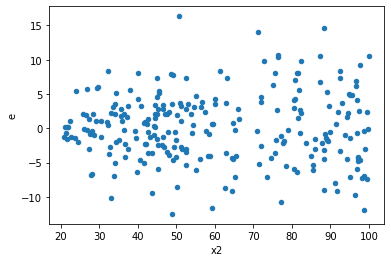

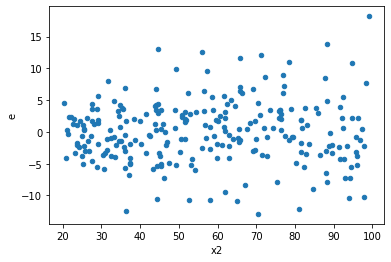

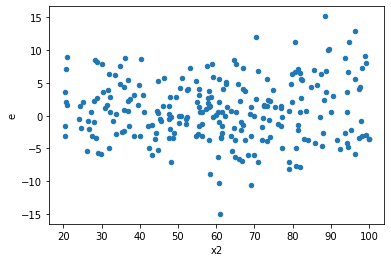

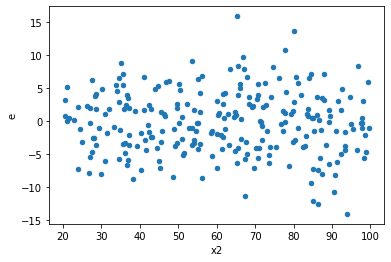

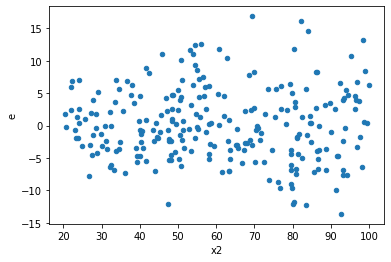

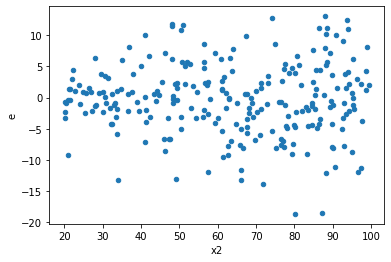

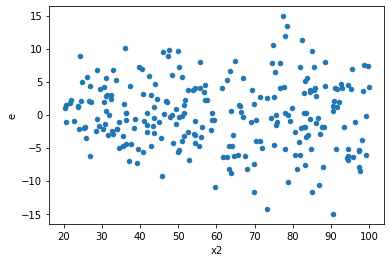

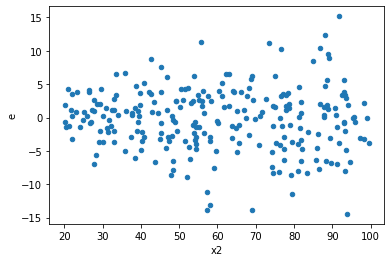

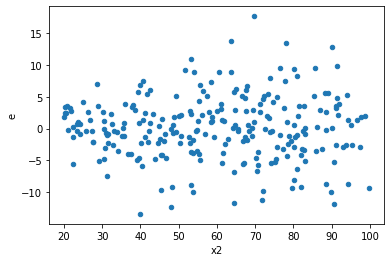

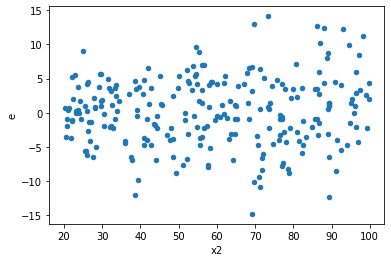

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,1205.8096052001713,3216.3819698253938,12.560516720835118,33.50397885234785,2.6674045022982344,2.5648899182328933e-06,0.9999987175550409,1.2824449591164466e-06,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,1501.4651738025798,3186.9241274570313,15.640262227110206,33.19712632767741,2.1225428222127145,0.0002774421958202655,0.9998612789020899,0.00013872109791013276,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,1353.436732476104,2580.203999362559,14.098299296626083,26.87712499335999,1.906409023377171,0.0017716904162181635,0.9991141547918909,0.0008858452081090817,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,1736.8784738779848,2433.802434290013,18.092484102895675,25.352108690520968,1.4012508479398582,0.10005777370786206,0.949971113146069,0.05002888685393103,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,1859.8737600298264,4004.640587738945,19.37368500031069,41.71500612228068,2.1531787123415964,0.00021295488756778447,0.9998935225562161,0.00010647744378389223,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,2132.944621971996,4271.72193477956,22.218173145541627,44.497103487287085,2.0027345720913163,0.00077818632285509,0.9996109068385725,0.000389093161427545,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,1757.3774188368993,3585.3667677544618,18.306014779551035,37.34757049744231,2.040180287582958,0.0005641602637576071,0.9997179198681212,0.00028208013187880354,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,1287.3211006814051,2909.6356283170753,13.409594798764637,30.3087044616362,2.260225228015719,8.442946325581957e-05,0.9999577852683721,4.2214731627909785e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,1482.0973091525216,2939.796190130003,15.438513637005434,30.622876980520868,1.9835379040064574,0.0009173703189213622,0.9995413148405393,0.0004586851594606811,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,1205.8096052001713,3216.3819698253938,12.560516720835118,33.50397885234785,2.6674045022982344,2.5648899182328933e-06,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,1501.4651738025798,3186.9241274570313,15.640262227110206,33.19712632767741,2.1225428222127145,0.0002774421958202655,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,1353.436732476104,2580.203999362559,14.098299296626083,26.87712499335999,1.906409023377171,0.0017716904162181635,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,1736.8784738779848,2433.802434290013,18.092484102895675,25.352108690520968,1.4012508479398582,0.10005777370786206,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,1859.8737600298264,4004.640587738945,19.37368500031069,41.71500612228068,2.1531787123415964,0.00021295488756778447,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,2132.944621971996,4271.72193477956,22.218173145541627,44.497103487287085,2.0027345720913163,0.00077818632285509,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,1757.3774188368993,3585.3667677544618,18.306014779551035,37.34757049744231,2.040180287582958,0.0005641602637576071,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,1287.3211006814051,2909.6356283170753,13.409594798764637,30.3087044616362,2.260225228015719,8.442946325581957e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,1482.0973091525216,2939.796190130003,15.438513637005434,30.622876980520868,1.9835379040064574,0.0009173703189213622,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    775
Reject001=1 : Homoscedasticity      225
Name: Result_test, dtype: int64